In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def generate_fake_sales_data(start_date, end_date, num_records):
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Generate sales values that follow Benford's Law
    first_digits = np.random.choice(np.arange(1, 10), size=num_records, p=np.log10(1 + 1/np.arange(1, 10)))
    remaining_digits = np.random.randint(0, 100, size=num_records)
    sales = first_digits * 100 + remaining_digits
    
    # Add some randomness and trend
    trend = np.linspace(0, 50, num_records)
    noise = np.random.normal(0, 10, num_records)
    sales = sales + trend + noise
    
    # Ensure all sales are positive
    sales = np.maximum(sales, 0.01)
    
    # Create DataFrame
    df = pd.DataFrame({
        'ORDERDATE': np.random.choice(date_range, size=num_records),
        'SALES': sales.round(2)
    })
    
    # Sort by date
    df = df.sort_values('ORDERDATE').reset_index(drop=True)
    
    return df

# Generate fake data
start_date = '2023-01-01'
end_date = '2023-12-31'
num_records = 365  # One sale per day

fake_data = generate_fake_sales_data(start_date, end_date, num_records)

# Save to CSV
fake_data.to_csv('fake_sales_data.csv', index=False)
print("Fake sales data has been generated and saved to 'fake_sales_data.csv'")

Fake sales data has been generated and saved to 'fake_sales_data.csv'


In [69]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def generate_fake_sales_data(start_date, end_date, num_records):
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Generate sales values that follow Benford's Law more closely
    first_digits = np.random.choice(np.arange(1, 10), size=num_records, p=np.log10(1 + 1/np.arange(1, 10)))
    remaining_digits = np.random.randint(0, 10000, size=num_records)
    sales = first_digits * 10000 + remaining_digits
    
    # Add some randomness and trend
    trend = np.linspace(0, 5000, num_records)
    noise = np.random.normal(0, 1000, num_records)
    sales = sales + trend + noise
    
    # Ensure all sales are positive and add some decimals for realism
    sales = np.maximum(sales, 0.01)
    sales = sales + np.random.randint(0, 100, size=num_records) / 100
    
    # Create DataFrame
    df = pd.DataFrame({
        'ORDERDATE': np.random.choice(date_range, size=num_records),
        'SALES': sales.round(2)
    })
    
    # Sort by date
    df = df.sort_values('ORDERDATE').reset_index(drop=True)
    
    return df

# Generate fake data
start_date = '2023-01-01'
end_date = '2023-12-31'
num_records = 1000  # One sale per day

fake_data = generate_fake_sales_data(start_date, end_date, num_records)

# Save to CSV
fake_data.to_csv('fake_sales_data.csv', index=False)
print("Fake sales data has been generated and saved to 'fake_sales_data.csv'")

Fake sales data has been generated and saved to 'fake_sales_data.csv'


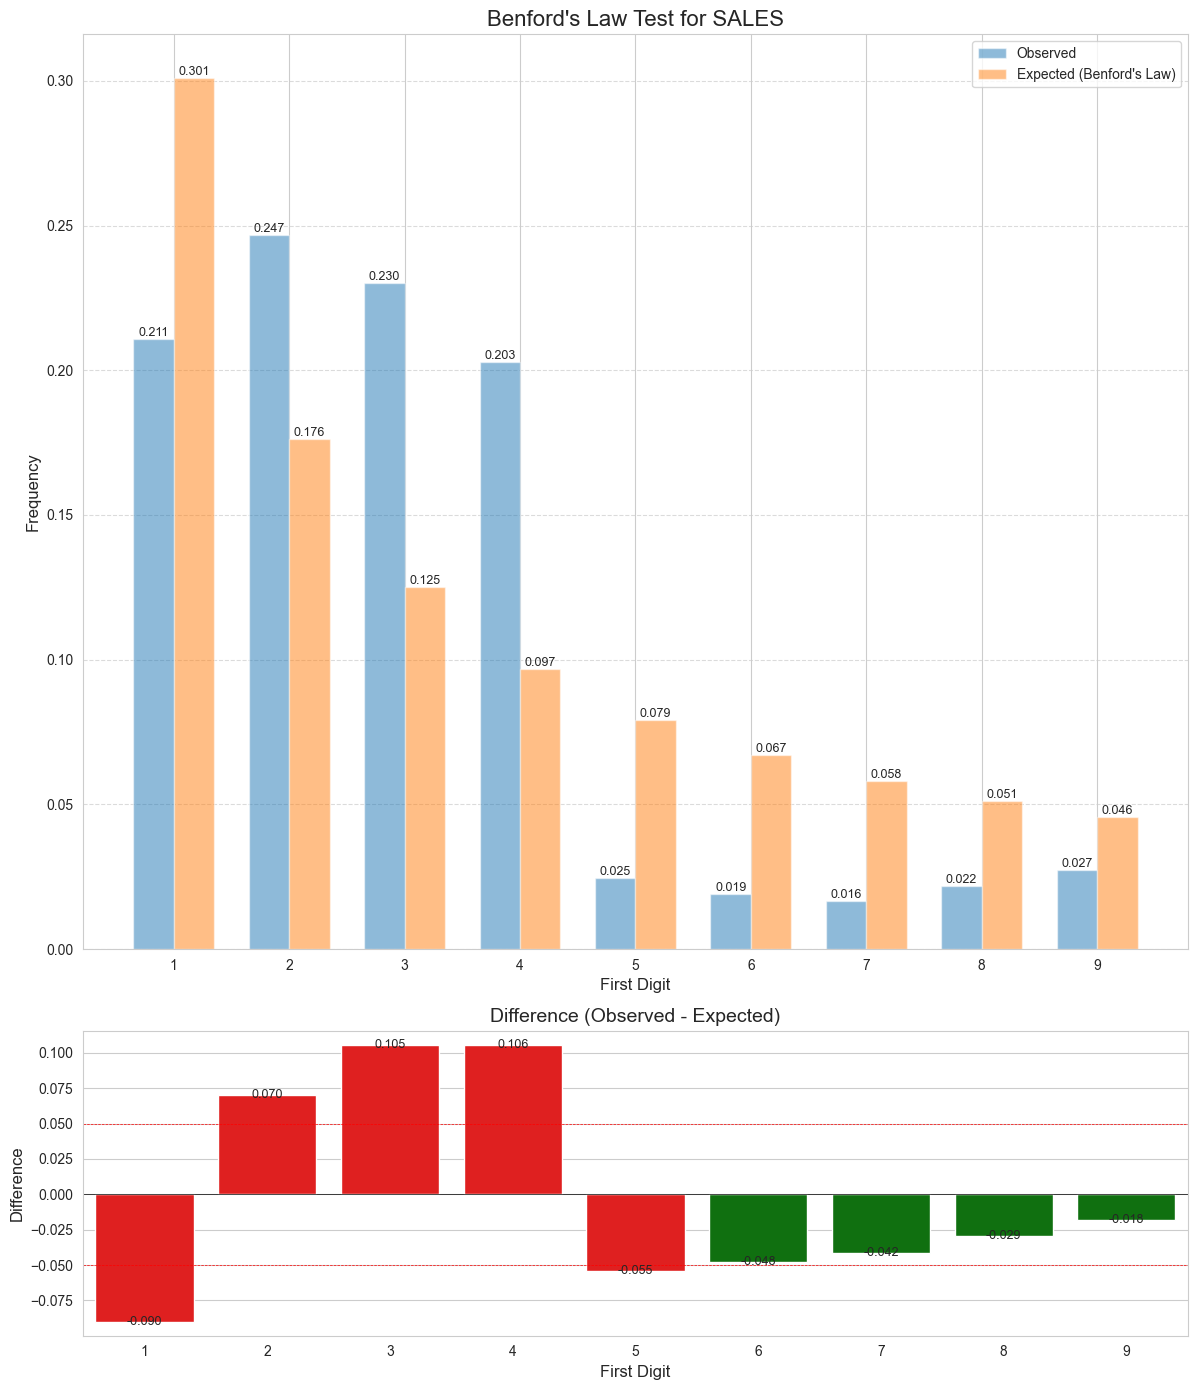

Benford's Law Test Results for SALES:

Digits within 5.0% margin of error: 4 out of 9
Deviation from expected:
Digit 1.0: -0.0901 (outside margin)
Digit 2.0: 0.0705 (outside margin)
Digit 3.0: 0.1052 (outside margin)
Digit 4.0: 0.1058 (outside margin)
Digit 5.0: -0.0545 (outside margin)
Digit 6.0: -0.0478 (within margin)
Digit 7.0: -0.0416 (within margin)
Digit 8.0: -0.0292 (within margin)
Digit 9.0: -0.0184 (within margin)

Statistically, the data does not follow Benford's Law (reject null hypothesis)
Even with a 5.0% margin of error, the data shows significant deviations from Benford's Law


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def get_first_digit(value):
    try:
        str_value = str(abs(value)).lstrip("0")
        if str_value and str_value[0].isdigit():
            return int(str_value[0])
    except:
        pass
    return None

def test_benfords_law(file_path, column_name, margin_of_error=0.05):
    data = pd.read_csv(file_path)
    first_digits = data[column_name].apply(get_first_digit).dropna()
    observed = first_digits.value_counts().sort_index()
    total_valid = len(first_digits)

    expected_proportions = np.log10(1 + 1 / np.arange(1, 10))
    expected = total_valid * expected_proportions

    # Ensure observed and expected have the same index
    full_range = pd.Series(index=range(1, 10), dtype=float)
    observed = observed.reindex(full_range.index, fill_value=0)

    observed_prop = observed / total_valid

    # Calculate chi-square and p-value
    chi_square, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

    # Prepare data for visualization
    results_df = pd.DataFrame({
        'Digit': range(1, 10),
        'Observed': observed_prop,
        'Expected': expected_proportions,
        'Difference': observed_prop - expected_proportions
    })

    # Create the visualization
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14), gridspec_kw={'height_ratios': [3, 1]})

    # First plot (original bar chart)
    x = np.arange(1, 10)
    width = 0.35

    ax1.bar(x - width/2, observed_prop, width, alpha=0.5, label="Observed")
    ax1.bar(x + width/2, expected_proportions, width, alpha=0.5, label="Expected (Benford's Law)")

    ax1.set_xlabel("First Digit", fontsize=12)
    ax1.set_ylabel("Frequency", fontsize=12)
    ax1.set_title(f"Benford's Law Test for {column_name}", fontsize=16)
    ax1.set_xticks(x)
    ax1.legend(fontsize=10)
    ax1.grid(axis='y', linestyle='--', alpha=0.7)

    for i, (obs, exp) in enumerate(zip(observed_prop, expected_proportions)):
        ax1.text(x[i] - width/2, obs, f'{obs:.3f}', ha='center', va='bottom', fontsize=9)
        ax1.text(x[i] + width/2, exp, f'{exp:.3f}', ha='center', va='bottom', fontsize=9)

    # Second plot (difference chart)
    sns.barplot(x='Digit', y='Difference', data=results_df, ax=ax2, palette=['red' if abs(d) > margin_of_error else 'green' for d in results_df['Difference']])
    ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    ax2.axhline(y=margin_of_error, color='red', linestyle='--', linewidth=0.5)
    ax2.axhline(y=-margin_of_error, color='red', linestyle='--', linewidth=0.5)

    ax2.set_title("Difference (Observed - Expected)", fontsize=14)
    ax2.set_xlabel("First Digit", fontsize=12)
    ax2.set_ylabel("Difference", fontsize=12)

    # Add value labels on the difference bars
    for i, diff in enumerate(results_df['Difference']):
        ax2.text(i, diff, f'{diff:.3f}', ha='center', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Print analysis results
    print(f"Benford's Law Test Results for {column_name}:")
    print(f"\nDigits within {margin_of_error*100}% margin of error: {sum(abs(results_df['Difference']) <= margin_of_error)} out of 9")
    print("Deviation from expected:")
    for _, row in results_df.iterrows():
        deviation = row['Difference']
        print(f"Digit {row['Digit']}: {deviation:.4f} ({'within' if abs(deviation) <= margin_of_error else 'outside'} margin)")

    if p_value > 0.05:
        print("\nStatistically, the data follows Benford's Law (fail to reject null hypothesis)")
    else:
        print("\nStatistically, the data does not follow Benford's Law (reject null hypothesis)")
    
    if sum(abs(results_df['Difference']) <= margin_of_error) >= 7:
        print(f"Considering a {margin_of_error*100}% margin of error, the data generally follows Benford's Law")
    else:
        print(f"Even with a {margin_of_error*100}% margin of error, the data shows significant deviations from Benford's Law")

if __name__ == "__main__":
    file_path = "data/fake.csv"
    column_name = "SALES"
    test_benfords_law(file_path, column_name, margin_of_error=0.05)

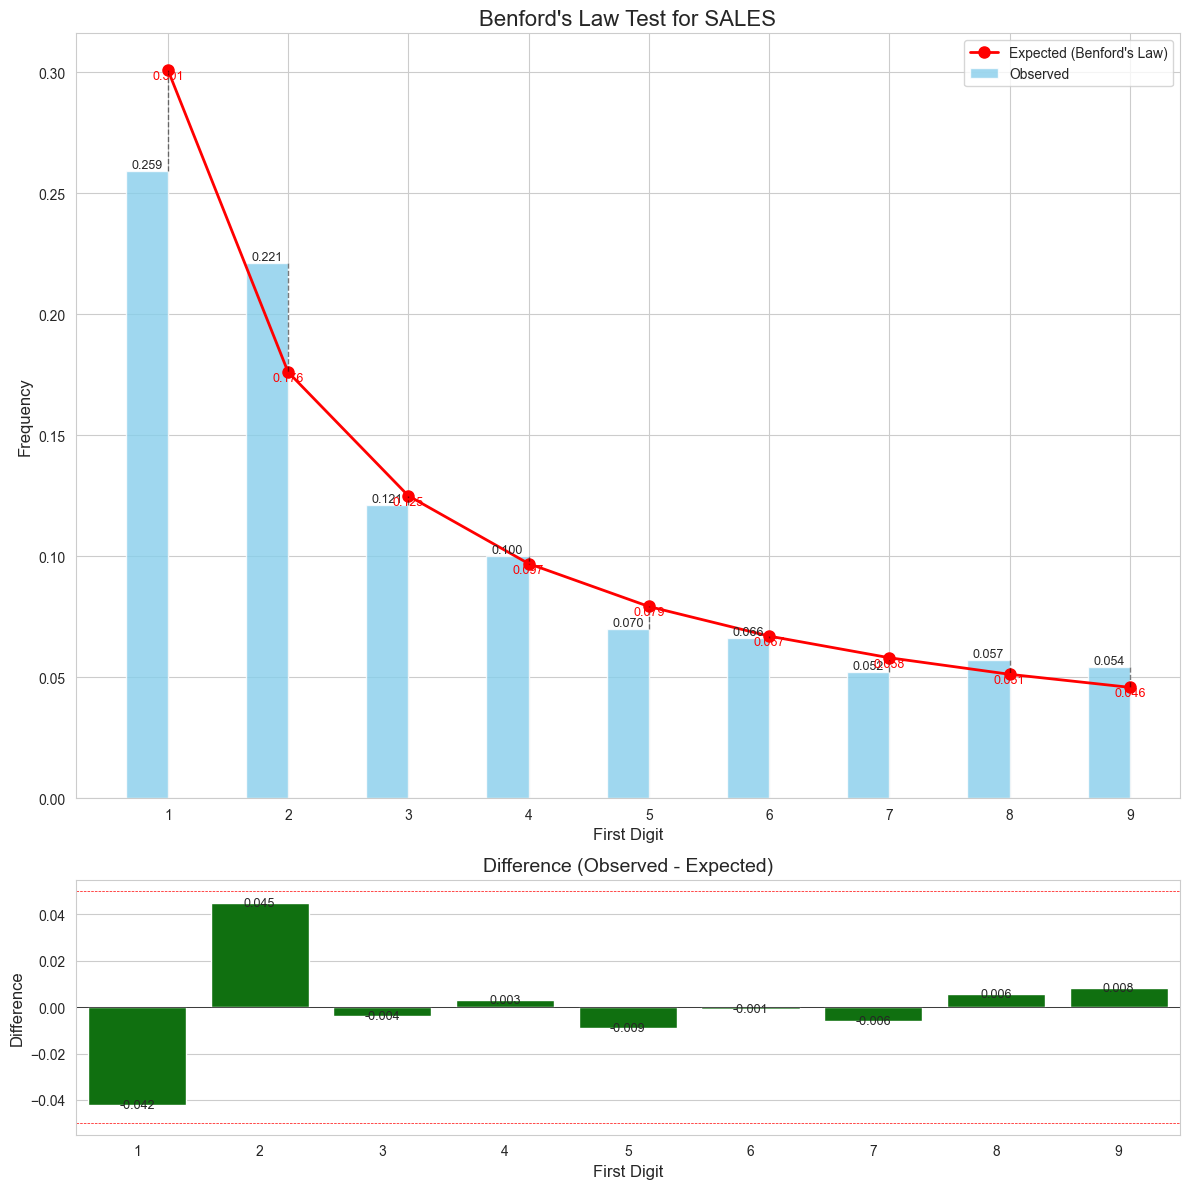

Benford's Law Analysis for SALES:
Using a margin of error of 5.0%

Digit-wise analysis:
Digit 1.0: Observed 0.259, Expected 0.301, Difference -0.042 (Within margin)
Digit 2.0: Observed 0.221, Expected 0.176, Difference 0.045 (Within margin)
Digit 3.0: Observed 0.121, Expected 0.125, Difference -0.004 (Within margin)
Digit 4.0: Observed 0.100, Expected 0.097, Difference 0.003 (Within margin)
Digit 5.0: Observed 0.070, Expected 0.079, Difference -0.009 (Within margin)
Digit 6.0: Observed 0.066, Expected 0.067, Difference -0.001 (Within margin)
Digit 7.0: Observed 0.052, Expected 0.058, Difference -0.006 (Within margin)
Digit 8.0: Observed 0.057, Expected 0.051, Difference 0.006 (Within margin)
Digit 9.0: Observed 0.054, Expected 0.046, Difference 0.008 (Within margin)

Digits within 5.0% margin of error: 9 out of 9
Conclusion: The data generally follows Benford's Law (at least 7 out of 9 digits within margin)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_first_digit(value):
    try:
        str_value = str(abs(value)).lstrip("0")
        if str_value and str_value[0].isdigit():
            return int(str_value[0])
    except:
        pass
    return None

def test_benfords_law(file_path, column_name, margin_of_error=0.05):
    data = pd.read_csv(file_path)
    first_digits = data[column_name].apply(get_first_digit).dropna()
    observed = first_digits.value_counts().sort_index()
    total_valid = len(first_digits)

    expected_proportions = np.log10(1 + 1 / np.arange(1, 10))
    expected = total_valid * expected_proportions

    # Ensure observed and expected have the same index
    full_range = pd.Series(index=range(1, 10), dtype=float)
    observed = observed.reindex(full_range.index, fill_value=0)

    observed_prop = observed / total_valid

    # Prepare data for visualization
    results_df = pd.DataFrame({
        'Digit': range(1, 10),
        'Observed': observed_prop,
        'Expected': expected_proportions,
        'Difference': observed_prop - expected_proportions
    })

    # Create the visualization
    sns.set_style("whitegrid")
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [3, 1]})

    # Improved first plot
    x = np.arange(1, 10)
    width = 0.35

    ax1.bar(x - width/2, results_df['Observed'], width, label='Observed', color='skyblue', alpha=0.8)
    ax1.plot(x, results_df['Expected'], 'ro-', label='Expected (Benford\'s Law)', linewidth=2, markersize=8)

    # Add connecting lines between observed and expected
    for i, (obs, exp) in enumerate(zip(results_df['Observed'], results_df['Expected'])):
        ax1.plot([i+1, i+1], [obs, exp], 'k--', linewidth=1, alpha=0.5)

    ax1.set_xlabel('First Digit', fontsize=12)
    ax1.set_ylabel('Frequency', fontsize=12)
    ax1.set_title(f"Benford's Law Test for {column_name}", fontsize=16)
    ax1.set_xticks(x)
    ax1.legend(fontsize=10)

    # Add value labels
    for i, (obs, exp) in enumerate(zip(results_df['Observed'], results_df['Expected'])):
        ax1.text(i+1-width/2, obs, f'{obs:.3f}', ha='center', va='bottom', fontsize=9)
        ax1.text(i+1, exp, f'{exp:.3f}', ha='center', va='top', fontsize=9, color='red')

    # Second plot (unchanged)
    sns.barplot(x='Digit', y='Difference', data=results_df, ax=ax2, palette=['red' if abs(d) > margin_of_error else 'green' for d in results_df['Difference']])
    ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    ax2.axhline(y=margin_of_error, color='red', linestyle='--', linewidth=0.5)
    ax2.axhline(y=-margin_of_error, color='red', linestyle='--', linewidth=0.5)

    ax2.set_title("Difference (Observed - Expected)", fontsize=14)
    ax2.set_xlabel("First Digit", fontsize=12)
    ax2.set_ylabel("Difference", fontsize=12)

    # Add value labels on the difference bars
    for i, diff in enumerate(results_df['Difference']):
        ax2.text(i, diff, f'{diff:.3f}', ha='center', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Print analysis results
    print(f"Benford's Law Analysis for {column_name}:")
    print(f"Using a margin of error of {margin_of_error*100}%")
    print("\nDigit-wise analysis:")
    for _, row in results_df.iterrows():
        status = 'Within margin' if abs(row['Difference']) <= margin_of_error else 'Outside margin'
        print(f"Digit {row['Digit']}: Observed {row['Observed']:.3f}, Expected {row['Expected']:.3f}, "
              f"Difference {row['Difference']:.3f} ({status})")

    digits_within_margin = sum(abs(row['Difference']) <= margin_of_error for _, row in results_df.iterrows())
    print(f"\nDigits within {margin_of_error*100}% margin of error: {digits_within_margin} out of 9")

    if digits_within_margin >= 7:
        print(f"Conclusion: The data generally follows Benford's Law (at least 7 out of 9 digits within margin)")
    else:
        print(f"Conclusion: The data shows significant deviations from Benford's Law")

if __name__ == "__main__":
    file_path = "fake_sales_data.csv"
    column_name = "SALES"
    test_benfords_law(file_path, column_name, margin_of_error=0.05)

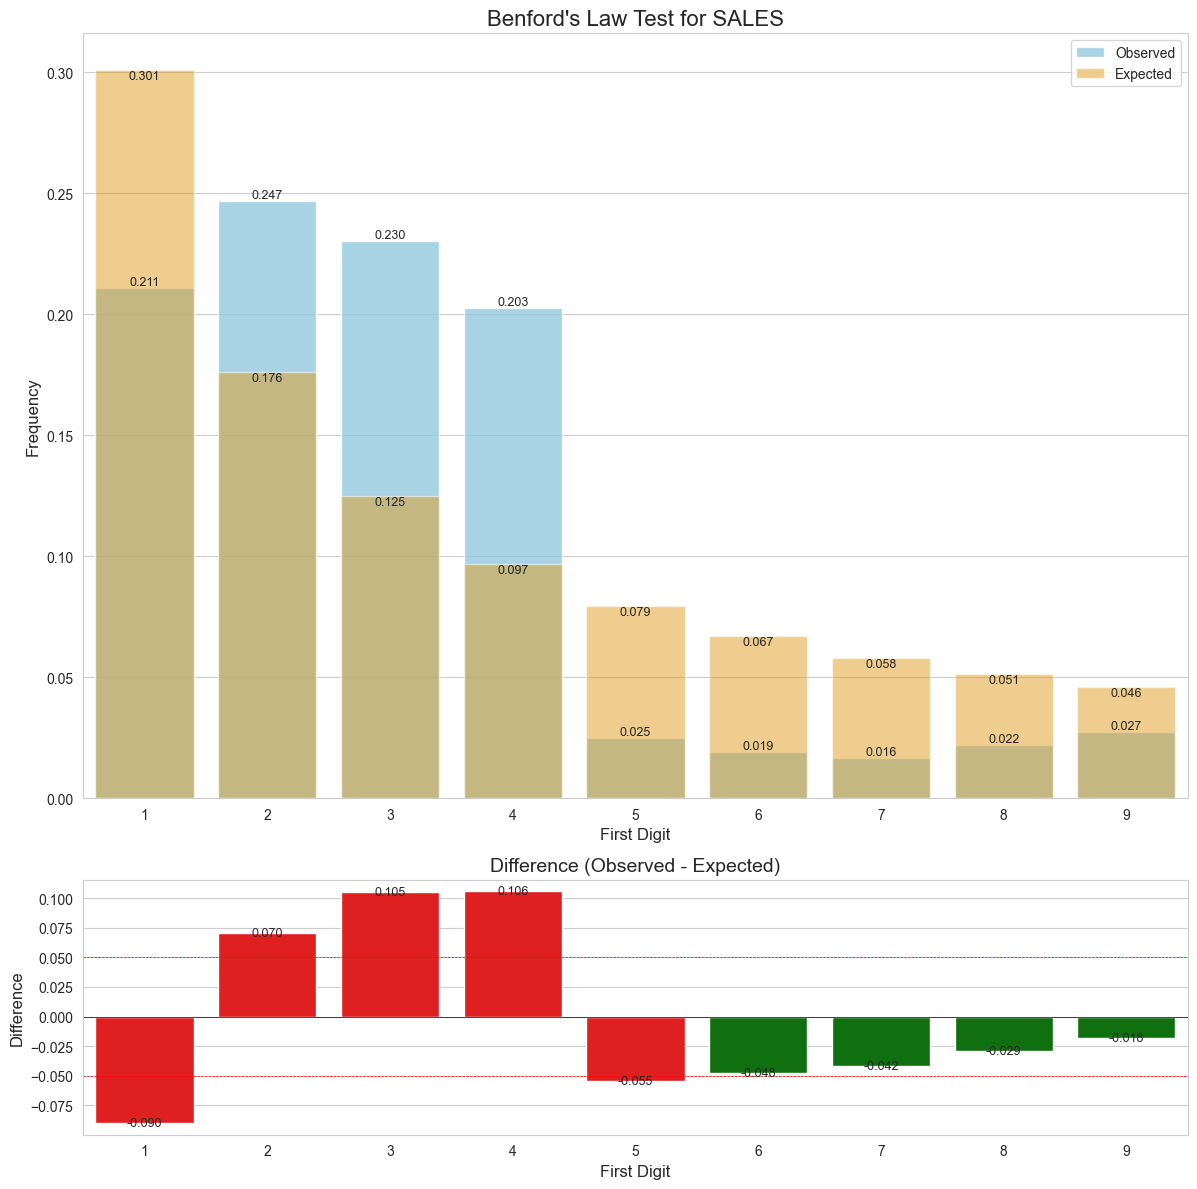

Benford's Law Analysis for SALES:
Using a margin of error of 5.0%
/nDigit-wise analysis:
Digit 1.0: Observed 0.211, Expected 0.301, Difference -0.090 (Outside margin)
Digit 2.0: Observed 0.247, Expected 0.176, Difference 0.070 (Outside margin)
Digit 3.0: Observed 0.230, Expected 0.125, Difference 0.105 (Outside margin)
Digit 4.0: Observed 0.203, Expected 0.097, Difference 0.106 (Outside margin)
Digit 5.0: Observed 0.025, Expected 0.079, Difference -0.055 (Outside margin)
Digit 6.0: Observed 0.019, Expected 0.067, Difference -0.048 (Within margin)
Digit 7.0: Observed 0.016, Expected 0.058, Difference -0.042 (Within margin)
Digit 8.0: Observed 0.022, Expected 0.051, Difference -0.029 (Within margin)
Digit 9.0: Observed 0.027, Expected 0.046, Difference -0.018 (Within margin)
/nDigits within 5.0% margin of error: 4 out of 9
Conclusion: The data shows significant deviations from Benford's Law


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_first_digit(value):
    try:
        str_value = str(abs(value)).lstrip("0")
        if str_value and str_value[0].isdigit():
            return int(str_value[0])
    except:
        pass
    return None

def test_benfords_law(file_path, column_name, margin_of_error=0.05):
    data = pd.read_csv(file_path)
    first_digits = data[column_name].apply(get_first_digit).dropna()
    observed = first_digits.value_counts().sort_index()
    total_valid = len(first_digits)

    expected_proportions = np.log10(1 + 1 / np.arange(1, 10))
    expected = total_valid * expected_proportions

    # Ensure observed and expected have the same index
    full_range = pd.Series(index=range(1, 10), dtype=float)
    observed = observed.reindex(full_range.index, fill_value=0)

    observed_prop = observed / total_valid

    # Prepare data for visualization
    results_df = pd.DataFrame({
        'Digit': range(1, 10),
        'Observed': observed_prop,
        'Expected': expected_proportions,
        'Difference': observed_prop - expected_proportions
    })

    # Create the visualization
    sns.set_style("whitegrid")
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [3, 1]})

    # Bar plot
    sns.barplot(x='Digit', y='Observed', data=results_df, ax=ax1, color='skyblue', alpha=0.8, label='Observed')
    sns.barplot(x='Digit', y='Expected', data=results_df, ax=ax1, color='orange', alpha=0.5, label='Expected')

    ax1.set_title("Benford's Law Test for " + column_name, fontsize=16)
    ax1.set_xlabel("First Digit", fontsize=12)
    ax1.set_ylabel("Frequency", fontsize=12)
    ax1.legend(fontsize=10)

    # Add value labels on the bars
    for i, (obs, exp) in enumerate(zip(observed_prop, expected_proportions)):
        ax1.text(i, obs, f'{obs:.3f}', ha='center', va='bottom', fontsize=9)
        ax1.text(i, exp, f'{exp:.3f}', ha='center', va='top', fontsize=9)

    # Difference plot
    sns.barplot(x='Digit', y='Difference', data=results_df, ax=ax2, palette=['red' if abs(d) > margin_of_error else 'green' for d in results_df['Difference']])
    ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    ax2.axhline(y=margin_of_error, color='red', linestyle='--', linewidth=0.5)
    ax2.axhline(y=-margin_of_error, color='red', linestyle='--', linewidth=0.5)

    ax2.set_title("Difference (Observed - Expected)", fontsize=14)
    ax2.set_xlabel("First Digit", fontsize=12)
    ax2.set_ylabel("Difference", fontsize=12)

    # Add value labels on the difference bars
    for i, diff in enumerate(results_df['Difference']):
        ax2.text(i, diff, f'{diff:.3f}', ha='center', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Print analysis results
    print(f"Benford's Law Analysis for {column_name}:")
    print(f"Using a margin of error of {margin_of_error*100}%")
    print("/nDigit-wise analysis:")
    for _, row in results_df.iterrows():
        status = 'Within margin' if abs(row['Difference']) <= margin_of_error else 'Outside margin'
        print(f"Digit {row['Digit']}: Observed {row['Observed']:.3f}, Expected {row['Expected']:.3f}, "
              f"Difference {row['Difference']:.3f} ({status})")

    digits_within_margin = sum(abs(row['Difference']) <= margin_of_error for _, row in results_df.iterrows())
    print(f"/nDigits within {margin_of_error*100}% margin of error: {digits_within_margin} out of 9")

    if digits_within_margin >= 7:
        print(f"Conclusion: The data generally follows Benford's Law (at least 7 out of 9 digits within margin)")
    else:
        print(f"Conclusion: The data shows significant deviations from Benford's Law")

if __name__ == "__main__":
    file_path = "data/fake.csv"
    column_name = "SALES"
    test_benfords_law(file_path, column_name, margin_of_error=0.05)

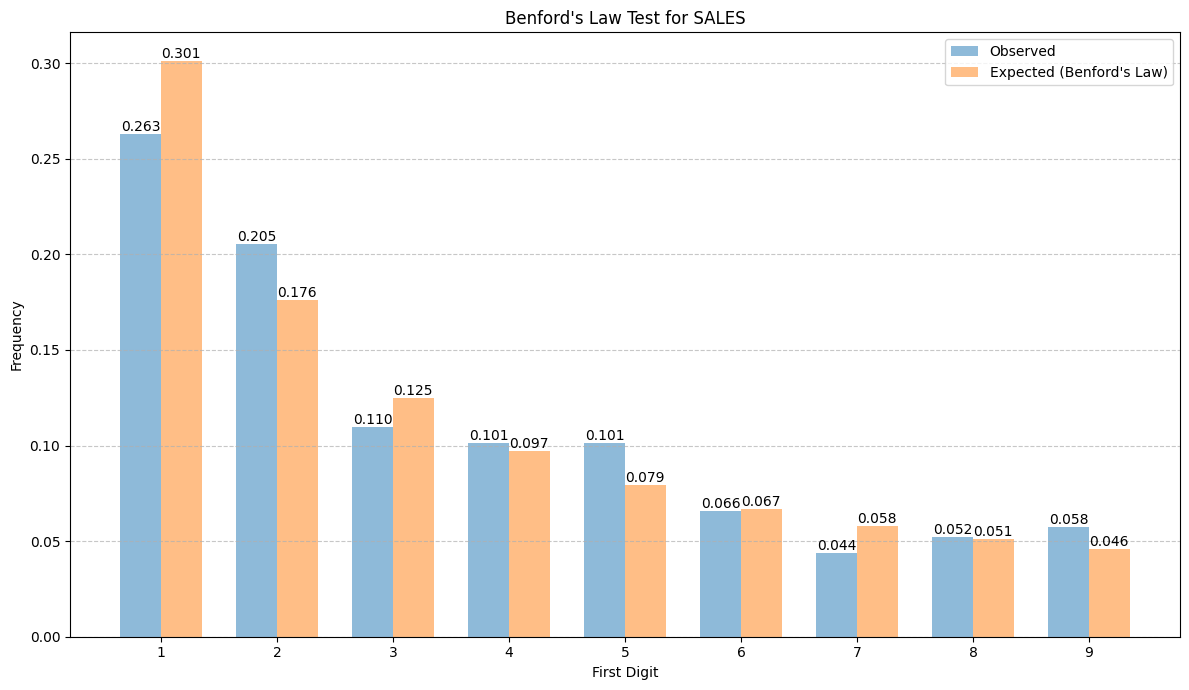

Benford's Law Test Results for SALES:
Chi-square statistic: 8.9565
p-value: 0.3460

Digits within 5.0% margin of error: 9 out of 9
Deviation from expected:
Digit 1: -0.0380 (within margin)
Digit 2: 0.0294 (within margin)
Digit 3: -0.0153 (within margin)
Digit 4: 0.0045 (within margin)
Digit 5: 0.0222 (within margin)
Digit 6: -0.0012 (within margin)
Digit 7: -0.0142 (within margin)
Digit 8: 0.0009 (within margin)
Digit 9: 0.0118 (within margin)

Statistically, the data follows Benford's Law (fail to reject null hypothesis)
However, considering a 5.0% margin of error, the data generally follows Benford's Law


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def get_first_digit(value):
    try:
        str_value = str(abs(value)).lstrip("0")
        if str_value and str_value[0].isdigit():
            return int(str_value[0])
    except:
        pass
    return None

def test_benfords_law(file_path, column_name, margin_of_error=0.05):
    data = pd.read_csv(file_path)
    first_digits = data[column_name].apply(get_first_digit).dropna()
    observed = first_digits.value_counts().sort_index()
    total_valid = len(first_digits)

    expected_proportions = np.log10(1 + 1 / np.arange(1, 10))
    expected = total_valid * expected_proportions

    # Ensure observed and expected have the same index
    full_range = pd.Series(index=range(1, 10), dtype=float)
    observed = observed.reindex(full_range.index, fill_value=0)

    chi_square, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

    plt.figure(figsize=(12, 7))
    x = np.arange(1, 10)
    width = 0.35

    observed_prop = observed / total_valid
    plt.bar(x - width/2, observed_prop, width, alpha=0.5, label="Observed")
    plt.bar(x + width/2, expected_proportions, width, alpha=0.5, label="Expected (Benford's Law)")

    plt.legend()
    plt.title(f"Benford's Law Test for {column_name}")
    plt.xlabel("First Digit")
    plt.ylabel("Frequency")
    plt.xticks(x)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for i, (obs, exp) in enumerate(zip(observed_prop, expected_proportions)):
        plt.text(x[i] - width/2, obs, f'{obs:.3f}', ha='center', va='bottom')
        plt.text(x[i] + width/2, exp, f'{exp:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    print(f"Benford's Law Test Results for {column_name}:")
    print(f"Chi-square statistic: {chi_square:.4f}")
    print(f"p-value: {p_value:.4f}")
    
    # Check if observed proportions are within the margin of error
    within_margin = np.abs(observed_prop - expected_proportions) <= margin_of_error
    digits_within_margin = within_margin.sum()
    
    print(f"\nDigits within {margin_of_error*100}% margin of error: {digits_within_margin} out of 9")
    print("Deviation from expected:")
    for digit, obs, exp in zip(range(1, 10), observed_prop, expected_proportions):
        deviation = obs - exp
        print(f"Digit {digit}: {deviation:.4f} ({'within' if abs(deviation) <= margin_of_error else 'outside'} margin)")
    
    if p_value > 0.05:
        print("\nStatistically, the data follows Benford's Law (fail to reject null hypothesis)")
    else:
        print("\nStatistically, the data does not follow Benford's Law (reject null hypothesis)")
    
    if digits_within_margin >= 7:  # At least 7 out of 9 digits within margin
        print(f"However, considering a {margin_of_error*100}% margin of error, the data generally follows Benford's Law")
    else:
        print(f"Even with a {margin_of_error*100}% margin of error, the data shows significant deviations from Benford's Law")

if __name__ == "__main__":
    file_path = "fake_sales_data.csv"
    # file_path = "C:/Users/ysyss/Desktop/Work/Projects/Accountent hakathon/Sales/fake.csv"
    column_name = "SALES"
    test_benfords_law(file_path, column_name, margin_of_error=0.05)

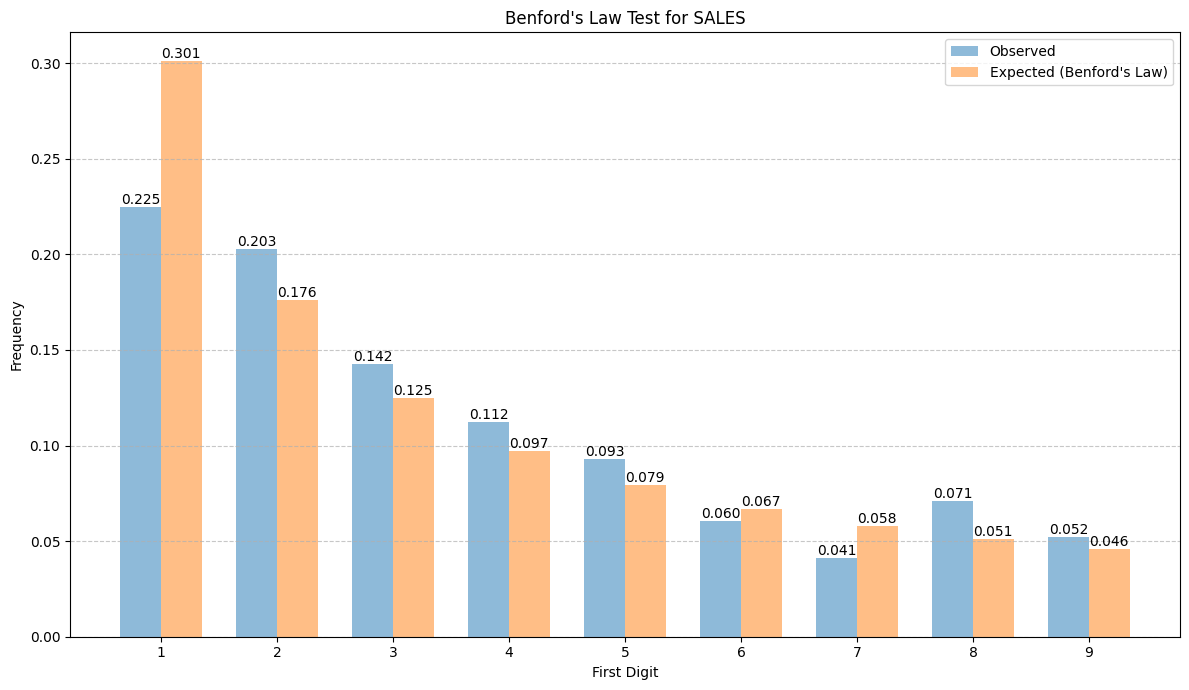

Benford's Law Test Results for SALES:
Chi-square statistic: 16.4697
p-value: 0.0361
The data does not follow Benford's Law (reject null hypothesis)


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def get_first_digit(value):
    try:
        str_value = str(abs(value)).lstrip("0")
        if str_value and str_value[0].isdigit():
            return int(str_value[0])
    except:
        pass
    return None

def test_benfords_law(file_path, column_name):
    data = pd.read_csv(file_path)
    first_digits = data[column_name].apply(get_first_digit).dropna()
    observed = first_digits.value_counts().sort_index()
    total_valid = len(first_digits)

    expected_proportions = np.log10(1 + 1 / np.arange(1, 10))
    expected = total_valid * expected_proportions

    # Ensure observed and expected have the same index
    full_range = pd.Series(index=range(1, 10), dtype=float)
    observed = observed.reindex(full_range.index, fill_value=0)

    chi_square, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

    plt.figure(figsize=(12, 7))
    x = np.arange(1, 10)
    width = 0.35

    plt.bar(x - width/2, observed / total_valid, width, alpha=0.5, label="Observed")
    plt.bar(x + width/2, expected_proportions, width, alpha=0.5, label="Expected (Benford's Law)")

    plt.legend()
    plt.title(f"Benford's Law Test for {column_name}")
    plt.xlabel("First Digit")
    plt.ylabel("Frequency")
    plt.xticks(x)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for i, (obs, exp) in enumerate(zip(observed / total_valid, expected_proportions)):
        plt.text(x[i] - width/2, obs, f'{obs:.3f}', ha='center', va='bottom')
        plt.text(x[i] + width/2, exp, f'{exp:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    print(f"Benford's Law Test Results for {column_name}:")
    print(f"Chi-square statistic: {chi_square:.4f}")
    print(f"p-value: {p_value:.4f}")
    if p_value > 0.05:
        print("The data follows Benford's Law (fail to reject null hypothesis)")
    else:
        print("The data does not follow Benford's Law (reject null hypothesis)")

if __name__ == "__main__":
    file_path = "C:/Users/ysyss/Desktop/Work/Projects/Accountent hakathon/Sales/fake.csv"
    # file_path = "fake_sales_data.csv"
    column_name = "SALES"
    test_benfords_law(file_path, column_name)